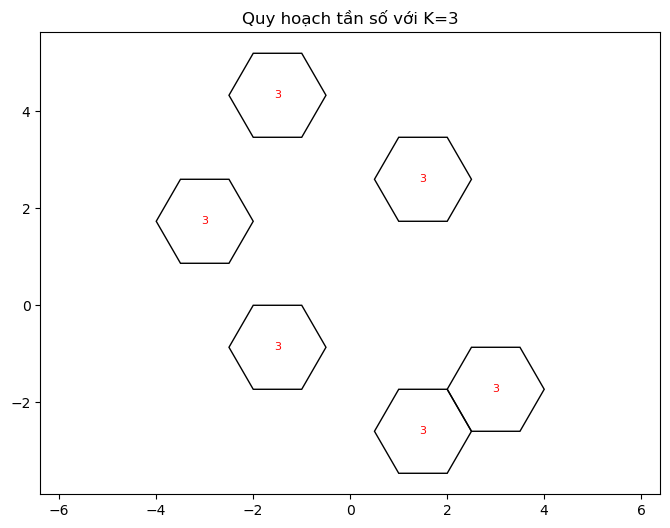

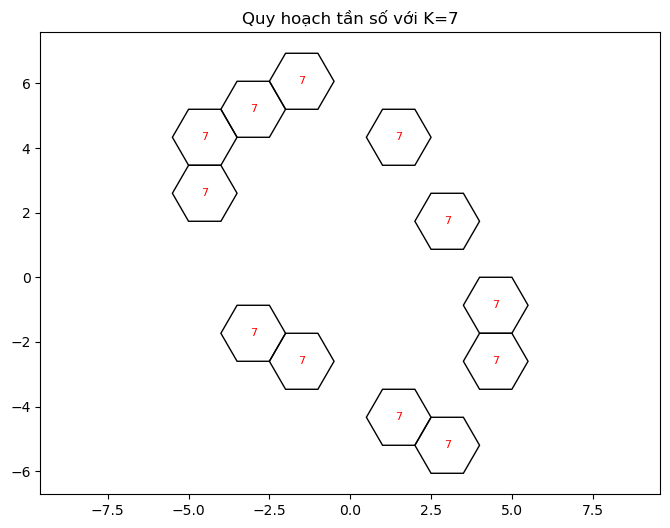

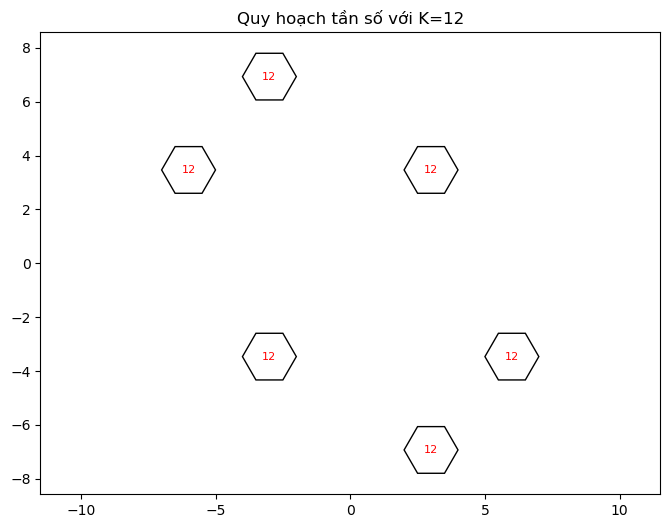

In [3]:
# 1. Quy hoạch tần số 
import numpy as np
import matplotlib.pyplot as plt

def generate_hexagonal_grid(K, radius, num_cells):
    """Tạo lưới hình lục giác mô phỏng các cell đồng kênh theo công thức K = i^2 + ij + j^2."""
    cells = []
    for i in range(-num_cells, num_cells+1):
        for j in range(-num_cells, num_cells+1):
            if i**2 + i*j + j**2 == K:
                x = radius * (3/2 * j)
                y = radius * (np.sqrt(3) * (i + 0.5 * (j % 2)))
                cells.append((x, y))
    return np.array(cells)

def plot_cells(K, radius):
    """Vẽ sơ đồ quy hoạch tần số cho giá trị K nhất định."""
    grid = generate_hexagonal_grid(K, radius, num_cells=5)
    plt.figure(figsize=(8, 6))
    for (x, y) in grid:
        hexagon = plt.Polygon(
            [[x + radius * np.cos(theta), y + radius * np.sin(theta)] for theta in np.linspace(0, 2 * np.pi, 7)],
            edgecolor='black', fill=False)
        plt.gca().add_patch(hexagon)
        plt.text(x, y, str(K), ha='center', va='center', fontsize=8, color='red')
    plt.xlim(-radius*6, radius*6)
    plt.ylim(-radius*6, radius*6)
    plt.title(f"Quy hoạch tần số với K={K}")
    plt.axis('equal')
    plt.show()

def calculate_cochannel_distance(K, R):
    """Tính khoảng cách tối thiểu giữa các cell đồng kênh."""
    return R * np.sqrt(3 * K)

def calculate_interference(K, R):
    """Tính mức nhiễu đồng kênh dựa trên khoảng cách D."""
    D = calculate_cochannel_distance(K, R)
    return 1 / (D ** 2)  # Nhiễu tỷ lệ nghịch với bình phương khoảng cách

radius = 1  # Bán kính cell
Ks = [3, 7, 12]  # Các giá trị K

for K in Ks:
    plot_cells(K, radius)

In [ ]:
#2. Tính toán mức nhiễu đồng kênh
for K in [7, 12]:
    D = calculate_cochannel_distance(K, radius)
    interference = calculate_interference(K, radius)
    print(f"K={K}: D={D:.2f}, Nhiễu đồng kênh={interference:.6f}")

K=7: D=4.58, Nhiễu đồng kênh=0.047619
K=12: D=6.00, Nhiễu đồng kênh=0.027778
